In [52]:
from pathlib import Path
import pandas as pd
import os
import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import numpy as np
%matplotlib inline

In [53]:
### create path to csv's and read csvs.
###path_name= ('../Resources/name.csv') ###
aapl_path = Path('Data/AAPL_daily_price.csv')
amazon_path = Path('Data/AMZN_daily_price.csv')
dowj_path = Path('Data/DOWJ_daily_price.csv')
fb_path = Path('Data/FB_daily_price.csv')
msft_path = Path('Data/MSFT_daily_price.csv')
nasdaq_path = Path('Data/NASDAQ_daily_price.csv')
nflx_path = Path('Data/NFLX_daily_price.csv')
sp500_path = Path('Data/SP500_daily_price.csv')
tsla_path = Path('Data/TSLA_daily_price.csv')
vix_path = Path('Data/VIX_daily_price.csv')
wmt_path = Path('Data/WMT_daily_price.csv')

In [54]:
### read in the data and set index to date time and create df. ###
### variable = pd.read_csv(path, index_col = "column name")
AAPL_csv = pd.read_csv(aapl_path, index_col= 'Date',infer_datetime_format = True, parse_dates = True)
AMAZ_csv = pd.read_csv(amazon_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
DOWJ_csv = pd.read_csv(dowj_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
FB_csv = pd.read_csv(fb_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
MSFT_csv = pd.read_csv(msft_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
NASDAQ_csv = pd.read_csv(nasdaq_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
NFLX_csv = pd.read_csv(nflx_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
SP500_csv = pd.read_csv(sp500_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
TSLA_csv = pd.read_csv(tsla_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
VIX_csv = pd.read_csv(vix_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
WMT_csv = pd.read_csv(wmt_path, index_col='Date',infer_datetime_format = True, parse_dates = True)

#rename columns
AAPL_csv = AAPL_csv.rename(columns={'Close':'AAPL'})
AMAZ_csv = AMAZ_csv.rename(columns={'Close':'AMZN'})
DOWJ_csv = DOWJ_csv.rename(columns={'Close':'DOWJ'})
FB_csv = FB_csv.rename(columns={'Close':'FB'})
MSFT_csv = MSFT_csv.rename(columns={'Close':'MSFT'})
NASDAQ_csv = NASDAQ_csv.rename(columns={'Close':'NASDAQ'})
NFLX_csv = NFLX_csv.rename(columns={'Close':'NFLX'})
SP500_csv = SP500_csv.rename(columns={'Close':'S&P500'})
TSLA_csv = TSLA_csv.rename(columns={'Close':'TSLA'})
VIX_csv = VIX_csv.rename(columns={'Close':'VIX'})
WMT_csv = WMT_csv.rename(columns={'Close':'WMT'})

NASDAQ_csv.index = pd.to_datetime(NASDAQ_csv.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')
VIX_csv.index = pd.to_datetime(VIX_csv.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')
SP500_csv.index = pd.to_datetime(SP500_csv.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')
DOWJ_csv.index = pd.to_datetime(DOWJ_csv.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')


In [55]:
#join stocks into one dataframe and indexes into another
stocks = pd.concat([AAPL_csv,AMAZ_csv,FB_csv,MSFT_csv,NFLX_csv,TSLA_csv,WMT_csv], join='inner', axis='columns')
stocks = stocks.drop(columns='Symbol')

stocks.index = pd.to_datetime(stocks.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')
stocks.head()

,AAPL,AMZN,FB,MSFT,NFLX,TSLA,WMT
2015-01-02,27.33,308.52,78.45,46.76,49.85,43.86,85.90
2015-01-05,26.56,302.19,77.19,46.33,47.31,42.02,85.65
2015-01-06,26.57,295.29,76.15,45.65,46.50,42.26,86.31
2015-01-07,26.94,298.42,76.15,46.23,46.74,42.19,88.60
2015-01-08,27.97,300.46,78.18,47.59,47.78,42.12,90.47


In [56]:
indexes = pd.concat([NASDAQ_csv,DOWJ_csv,SP500_csv,VIX_csv],join='inner',axis='columns')
indexes = indexes.drop(columns='Symbol')
indexes.head()

,NASDAQ,DOWJ,S&P500,VIX
2015-01-02,4726.81,17832.99,2058.20,17.79
2015-01-05,4652.57,17501.65,2020.58,19.92
2015-01-06,4592.74,17371.64,2002.61,21.12
2015-01-07,4650.47,17584.52,2025.90,19.31
2015-01-08,4736.19,17907.87,2062.14,17.01


In [57]:
###calculate daily percent change for each culumn from all data sources ###
daily_change_indexes = indexes.pct_change()

##remove all null values#

daily_change_indexes = daily_change_indexes.dropna()
daily_change_indexes.head()

,NASDAQ,DOWJ,S&P500,VIX
2015-01-05,-0.015706,-0.018580,-0.018278,0.119730
2015-01-06,-0.012860,-0.007428,-0.008893,0.060241
2015-01-07,0.012570,0.012254,0.011630,-0.085701
2015-01-08,0.018433,0.018388,0.017888,-0.119109
2015-01-09,-0.006782,-0.009521,-0.008404,0.031746


In [58]:
daily_change_stocks = stocks.pct_change()
daily_change_stocks = daily_change_stocks.dropna()
daily_change_stocks.head()

,AAPL,AMZN,FB,MSFT,NFLX,TSLA,WMT
2015-01-05,-0.028174,-0.020517,-0.016061,-0.009196,-0.050953,-0.041952,-0.002910
2015-01-06,0.000377,-0.022833,-0.013473,-0.014677,-0.017121,0.005712,0.007706
2015-01-07,0.013925,0.010600,0.000000,0.012705,0.005161,-0.001656,0.026532
2015-01-08,0.038233,0.006836,0.026658,0.029418,0.022251,-0.001659,0.021106
2015-01-09,0.001073,-0.011749,-0.005628,-0.008405,-0.015488,-0.018756,-0.012380


In [59]:
daily_change_indexes.hvplot.line(figsize=(20,10))

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [60]:
daily_change_stocks.hvplot.line(figsize=(30,20))

:NdOverlay   [Variable]
   :Curve   [index]   (value)

C:\Users\aafza\anaconda3\envs\pyvizenv\lib\site-packages\pandas\plotting\_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

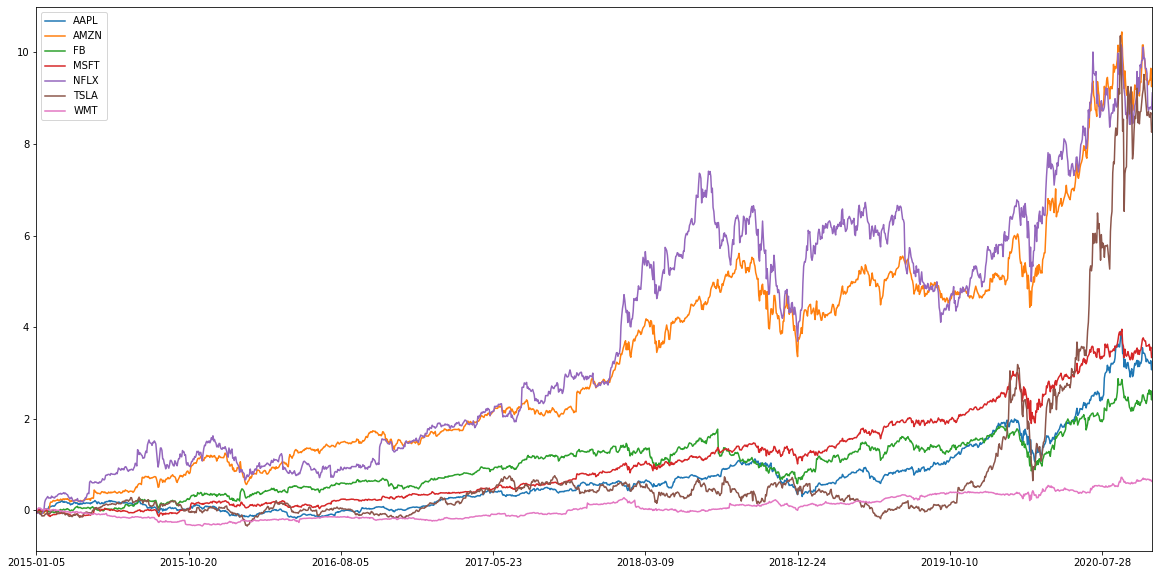

In [61]:
#cumulative returns
stocks_cumulative_returns = (1+ daily_change_stocks).cumprod()-1
stocks_cumulative_returns.plot(figsize=[20,10])

C:\Users\aafza\anaconda3\envs\pyvizenv\lib\site-packages\pandas\plotting\_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

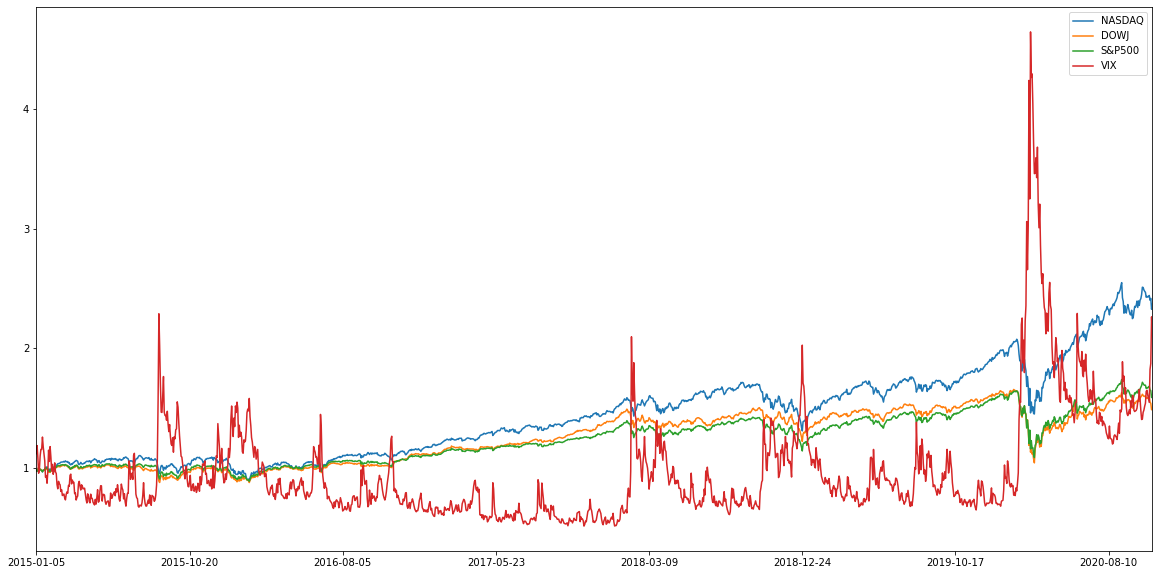

In [62]:
indexes_cumulative_returns = (1+ daily_change_indexes).cumprod()
indexes_cumulative_returns.plot(figsize=[20,10])

In [63]:
###for risk analysis  calculate the following ratios###
### calculate standard deviation for combined dataframe###
indexes_std = daily_change_indexes.std()
stocks_std = daily_change_stocks.std()


C:\Users\aafza\anaconda3\envs\pyvizenv\lib\site-packages\pandas\plotting\_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\aafza\anaconda3\envs\pyvizenv\lib\site-packages\pandas\plotting\_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


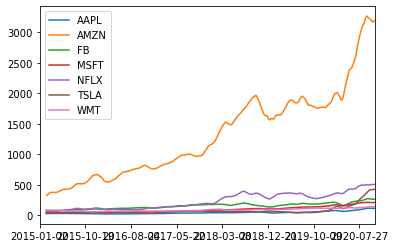

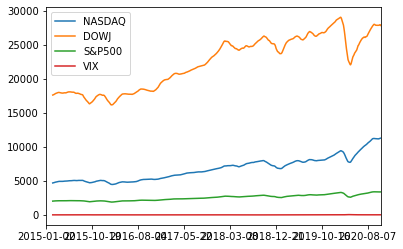

In [64]:
### dataframe.rolling(window = 7, 30, 90, 180 etc..).mean().plot()
rolling_30_stocks = stocks.rolling(window=30).mean().plot()
rolling_30_indexes = indexes.rolling(window=30).mean().plot()

In [65]:
daily_stocks_indexes = pd.concat([daily_change_stocks,daily_change_indexes],join='inner',axis='columns')
daily_stocks_indexes.head()

,AAPL,AMZN,FB,MSFT,NFLX,TSLA,WMT,NASDAQ,DOWJ,S&P500,VIX
2015-01-05,-0.028174,-0.020517,-0.016061,-0.009196,-0.050953,-0.041952,-0.002910,-0.015706,-0.018580,-0.018278,0.119730
2015-01-06,0.000377,-0.022833,-0.013473,-0.014677,-0.017121,0.005712,0.007706,-0.012860,-0.007428,-0.008893,0.060241
2015-01-07,0.013925,0.010600,0.000000,0.012705,0.005161,-0.001656,0.026532,0.012570,0.012254,0.011630,-0.085701
2015-01-08,0.038233,0.006836,0.026658,0.029418,0.022251,-0.001659,0.021106,0.018433,0.018388,0.017888,-0.119109
2015-01-09,0.001073,-0.011749,-0.005628,-0.008405,-0.015488,-0.018756,-0.012380,-0.006782,-0.009521,-0.008404,0.031746


In [66]:
### calculate beta ###
# calculate variance of each

aapl_variance = daily_change_stocks['AAPL'].var()
amzn_variance = daily_change_stocks['AMZN'].var()
fb_variance = daily_change_stocks['FB'].var()
msft_variance = daily_change_stocks['MSFT'].var()
nflx_variance = daily_change_stocks['NFLX'].var()
tsla_variance = daily_change_stocks['TSLA'].var()
wmt_variance = daily_change_stocks['WMT'].var()

In [67]:
# Calculate covariance of all daily returns 
###covariance
aapl_covariance = daily_change_stocks['AAPL'].cov(daily_change_indexes['S&P500'])
amzn_covariance = daily_change_stocks['AMZN'].cov(daily_change_indexes['S&P500'])
fb_covariance = daily_change_stocks['FB'].cov(daily_change_indexes['S&P500'])
msft_covariance = daily_change_stocks['MSFT'].cov(daily_change_indexes['S&P500'])
nflx_covariance = daily_change_stocks['NFLX'].cov(daily_change_indexes['S&P500'])
tsla_covariance = daily_change_stocks['TSLA'].cov(daily_change_indexes['S&P500'])
wmt_covariance = daily_change_stocks['WMT'].cov(daily_change_indexes['S&P500'])

In [68]:
# Calculate beta
aapl_beta = aapl_covariance / aapl_variance
amzn_beta = amzn_covariance / amzn_variance
fb_beta = fb_covariance / fb_variance
msft_beta = msft_covariance / msft_variance
nflx_beta = nflx_covariance / nflx_variance
tsla_beta = tsla_covariance / tsla_variance
wmt_beta = wmt_covariance / wmt_variance

In [69]:
# 30days rolling variance
SP500_rolling_variance = daily_change_indexes['S&P500'].rolling(window=30).var()

# 30days rolling covariance of each stocks comparing with S&P500 

AAPL_rolling_covariance = daily_change_stocks['AAPL'].rolling(window=30).cov(daily_change_indexes['S&P500'])
AMZN_rolling_covariance = daily_change_stocks['AMZN'].rolling(window=30).cov(daily_change_indexes['S&P500'])
FB_rolling_covariance = daily_change_stocks['FB'].rolling(window=30).cov(daily_change_indexes['S&P500'])
MSFT_rolling_covariance = daily_change_stocks['MSFT'].rolling(window=30).cov(daily_change_indexes['S&P500'])
NFLX_rolling_covariance = daily_change_stocks['NFLX'].rolling(window=30).cov(daily_change_indexes['S&P500'])
TSLA_rolling_covariance = daily_change_stocks['TSLA'].rolling(window=30).cov(daily_change_indexes['S&P500'])
WMT_rolling_covariance = daily_change_stocks['WMT'].rolling(window=30).cov(daily_change_indexes['S&P500'])

# 30days rolling days
AAPL_rolling_beta = AAPL_rolling_covariance/ SP500_rolling_variance
AMZN_rolling_beta = AMZN_rolling_covariance/ SP500_rolling_variance
FB_rolling_beta = FB_rolling_covariance/ SP500_rolling_variance
MSFT_rolling_beta = MSFT_rolling_covariance/ SP500_rolling_variance
NFLX_rolling_beta = NFLX_rolling_covariance/ SP500_rolling_variance
TSLA_rolling_beta = TSLA_rolling_covariance/ SP500_rolling_variance
WMT_rolling_beta = WMT_rolling_covariance/ SP500_rolling_variance


C:\Users\aafza\anaconda3\envs\pyvizenv\lib\site-packages\pandas\plotting\_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


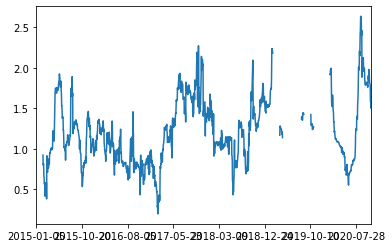

In [70]:
# 30 days rolling beta plots

AAPL_rolling_beta_plot = AAPL_rolling_beta.plot()

C:\Users\aafza\anaconda3\envs\pyvizenv\lib\site-packages\pandas\plotting\_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


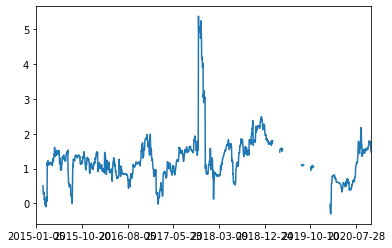

In [71]:
AMZN_rolling_beta_plot = AMZN_rolling_beta.plot()

C:\Users\aafza\anaconda3\envs\pyvizenv\lib\site-packages\pandas\plotting\_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


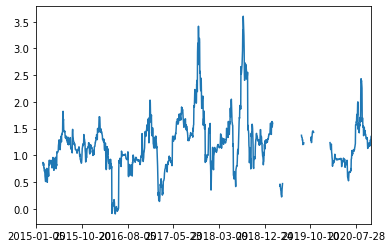

In [72]:

FB_rolling_beta_plot = FB_rolling_beta.plot()

C:\Users\aafza\anaconda3\envs\pyvizenv\lib\site-packages\pandas\plotting\_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


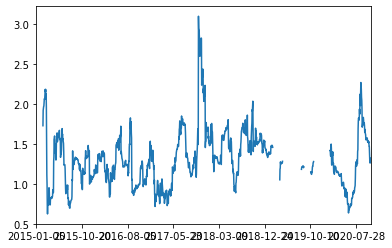

In [73]:
MSFT_rolling_beta_plot = MSFT_rolling_beta.plot()

C:\Users\aafza\anaconda3\envs\pyvizenv\lib\site-packages\pandas\plotting\_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


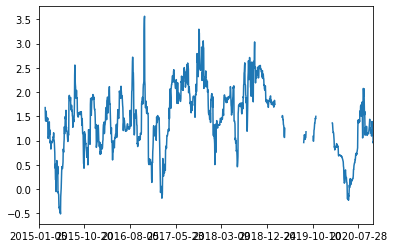

In [74]:
NFLX_rolling_beta_plot = NFLX_rolling_beta.plot()


C:\Users\aafza\anaconda3\envs\pyvizenv\lib\site-packages\pandas\plotting\_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


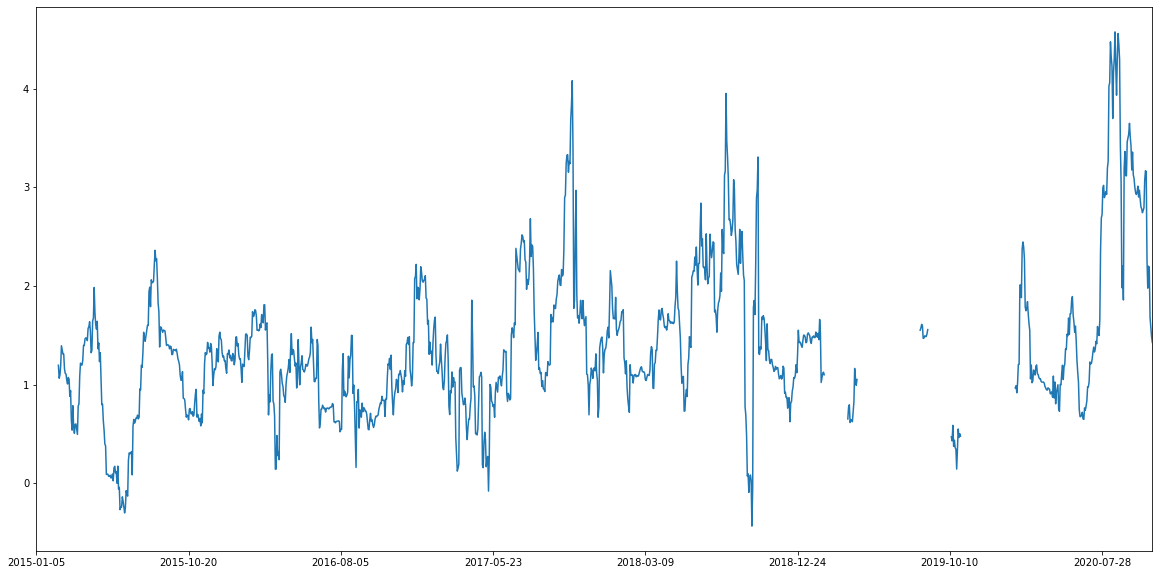

In [75]:

TSLA_rolling_beta_plot = TSLA_rolling_beta.plot(figsize=(20,10))


C:\Users\aafza\anaconda3\envs\pyvizenv\lib\site-packages\pandas\plotting\_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


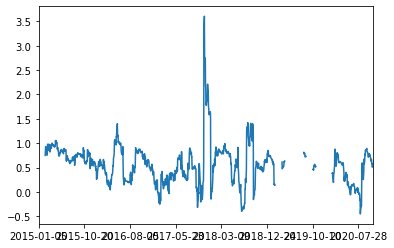

In [76]:

WMT_rolling_beta_plot = WMT_rolling_beta.plot()

In [77]:
### calculate the sharpe ratios by computing the quotient of annualized average return and annualized statard deviaiton#
sharpe_ratios_all = (daily_stocks_indexes.mean() * 252) / (daily_stocks_indexes.std() * np.sqrt(252))
sharpe_ratios_all


AAPL      0.959022
AMZN      1.459217
FB        0.835296
MSFT      1.035596
NFLX      1.139684
TSLA      0.950320
WMT       0.474141
NASDAQ    0.818912
DOWJ      0.453077
S&P500    0.530642
VIX       0.733375
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios for Stocks and Indexes'}>

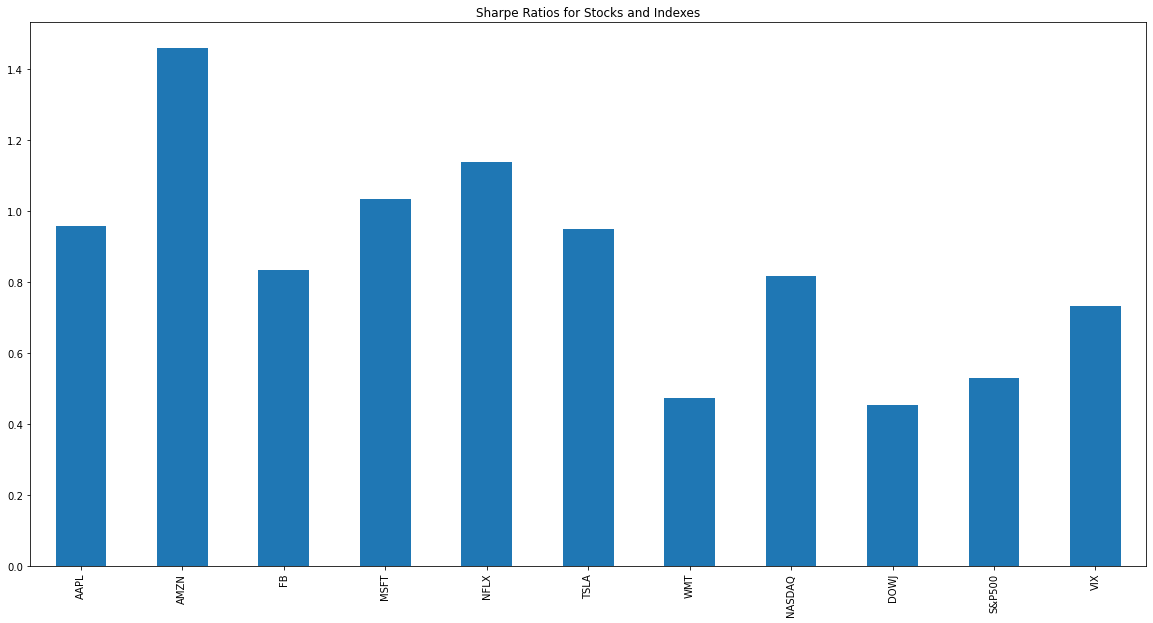

In [78]:
sharpe_ratios_all.plot.bar(figsize=(20,10),title= "Sharpe Ratios for Stocks and Indexes")